## Capstone Analytic Report and Research Proposal

#### Content

I have choosen a data taken from the DP03 and DP05 tables of the 2015 and 2017 American Community Survey 5-year estimates.  The full dataset and additional data can be found at the American Factfinder [website](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml).  I used the following two data files: 

1. `acs2015_county_data.csv`
2. `acs2017_county_data.csv`

The two file have same structure, with just a small difference in the name of the id column (CensusId vs CountyId) and the name of the citizen column(Citizen vs VotingAgeCitizen).  These are county datasets. Counties are political subdivisions, and the boundaries of some have been set for centuries.  

The Census Bureau updates the estimates every year.

#### Acknowledgements

The data here was collected by the U.S. Census Bureau.  As a product of the U.S. Federal government, this is not subject to copyright within the U.S.

These datasets were retrieved from the Kaggler MuonNeutrino, who collected them and created the [Kaggle dataset](https://www.kaggle.com/muonneutrino/us-census-demographic-data/data). 

#### Inspiration

I chose this dataset as it provided plenty of data to play with and allows me to practice my new skills. I have heard about different aspects of the United States population, but how many are based completely on data and how many are heresay. I chose the 2015 and 2017 dataset to compare and see what changes have occurred within a two year period.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
# 2015 Census Data
df15 = pd.read_csv('acs2015_county_data.csv', index_col=None)

# 2017 Census Data
df17 = pd.read_csv('acs2017_county_data.csv', index_col=None)

Since there are 37 columns of data, I decided narrowing down what I am working with would be more efficient.  I am removing counties, columns that have percentages, and Puerto Rico.  I chose to remove columns with percentages as I am using mean as my main measure of central tendency to explore. I also feel that I would not be able to properly show the differences, such as the differences in race.  I determined this after seeing the first few rows of counties in Alabama and seeing the distinctive changes in race.

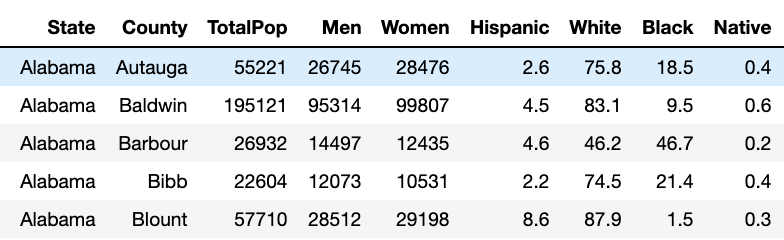

In [3]:
# Removing counties and consolidating the data by grouping per state to the 2015 dataset.
state15 = df15.groupby(by='State').mean().round(2)
#.round(2)
# Resetting index to prevent 'State from being a row index'
state15 = state15.reset_index(drop=False)

#Removing columns that have percentages as I have plenty with whole numbers to explore.
state15 = state15.drop(columns=['Hispanic','White','Black','Native','Asian','Pacific',
                                'Poverty','ChildPoverty','Professional','Service','Office',
                                'Construction','Production','Drive','Carpool', 'Transit',
                                'Walk', 'OtherTransp','WorkAtHome','PrivateWork','PublicWork',
                                'SelfEmployed','FamilyWork','Unemployment'])

# Removing Puerto Rico from 2015 dataset
state15 = state15[state15.State != 'Puerto Rico']

state15.head()

,State,CensusId,TotalPop,Men,Women,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed
0,Alabama,1067.00,72098.81,34941.69,37157.12,54044.69,37973.13,2250.34,20780.94,1029.79,25.93,30183.96
1,Alaska,2149.66,25288.79,13246.90,12041.90,18067.10,64197.10,5383.31,30332.97,2260.59,11.23,12107.17
2,Arizona,4013.87,442795.20,219939.20,222856.00,301772.93,43252.20,1892.67,21052.53,728.53,21.72,187560.40
3,Arkansas,5075.00,39442.77,19358.84,20083.93,28854.44,36626.48,2590.27,20072.03,1247.32,23.17,16747.75
4,California,6058.00,662439.03,329088.53,333350.50,418626.71,56013.16,2242.12,27902.60,947.17,24.97,297351.03


In [4]:
# Removing counties and consolidating the data by grouping per state to the 2017 dataset.
state17 = df17.groupby(by='State').mean().round()
# Resetting index to prevent 'State from being a row index'
state17 = state17.reset_index(drop=False)

#Removing columns that have percentages as I have plenty with whole numbers to explore.
state17 = state17.drop(columns=['Hispanic','White','Black','Native','Asian','Pacific',
                                'Poverty','ChildPoverty','Professional','Service','Office',
                                'Construction','Production','Drive','Carpool', 'Transit',
                                'Walk', 'OtherTransp','WorkAtHome','PrivateWork',
                                'PublicWork','SelfEmployed','FamilyWork','Unemployment'])

#Removing Puerto Rico from 2017 dataset
state17 = state17[state17.State != 'Puerto Rico']

state17.head()

,State,CountyId,TotalPop,Men,Women,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed
0,Alabama,1067.0,72400.0,35087.0,37313.0,54506.0,40271.0,2513.0,22180.0,1195.0,26.0,30679.0
1,Alaska,2150.0,25468.0,13321.0,12146.0,18295.0,66425.0,5501.0,31671.0,2341.0,11.0,12208.0
2,Arizona,4014.0,453996.0,225670.0,228326.0,312678.0,45817.0,2160.0,22712.0,805.0,22.0,196926.0
3,Arkansas,5075.0,39706.0,19489.0,20217.0,29119.0,39025.0,2859.0,21449.0,1438.0,23.0,17020.0
4,California,6058.0,672118.0,333907.0,338212.0,430519.0,61047.0,2232.0,30416.0,1022.0,26.0,310240.0


Since U.S. regions are referred to in many places from new articles, books, maps, etc, I decided that would be helpful in seeing the big picture easier.

I have created State/Region data dict per [Wikipedia](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States).  I will add a column to the datasets for `Region` to allow me to do queries by region.

In [5]:
region = {"Connecticut": 'Northeast',"Maine": 'Northeast',"Massachusetts": 'Northeast',
           "New Hampshire": 'Northeast', "Rhode Island": 'Northeast',"Vermont": 'Northeast',
           "New Jersey": 'Northeast',"New York": 'Northeast', "Pennsylvania": 'Northeast',
           "Indiana": 'Midwest',"Illinois": 'Midwest',"Michigan": 'Midwest',"Ohio": 'Midwest',
           "Wisconsin": 'Midwest',"Iowa": 'Midwest',"Kansas": 'Midwest',"Minnesota": 'Midwest',
           "Missouri": 'Midwest',"Nebraska": 'Midwest',"North Dakota": 'Midwest',
           "South Dakota": 'Midwest',"Delaware": 'South',"District of Columbia": 'South',
           "Florida": 'South',"Georgia": 'South',"Maryland": 'South',"North Carolina": 'South',
           "South Carolina": 'South',"Virginia": 'South',"West Virginia": 'South',"Alabama": 'South',
           "Kentucky": 'South',"Mississippi": 'South',"Tennessee": 'South',"Arkansas": 'South',
           "Louisiana": 'South',"Oklahoma": 'South',"Texas": 'South',"Arizona": 'West',
           "Colorado": 'West',"Idaho": 'West',"New Mexico": 'West',"Montana": 'West',
           "Utah": 'West',"Nevada": 'West',"Wyoming": 'West',"Alaska": 'West',"California": 'West',
            "Hawaii": 'West',"Oregon": 'West',"Washington": 'West'}

In [6]:
# Adding Region column to 2015 dataset.
state15["Region"] = state15["State"].replace(region)

state15.head()

,State,CensusId,TotalPop,Men,Women,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed,Region
0,Alabama,1067.00,72098.81,34941.69,37157.12,54044.69,37973.13,2250.34,20780.94,1029.79,25.93,30183.96,South
1,Alaska,2149.66,25288.79,13246.90,12041.90,18067.10,64197.10,5383.31,30332.97,2260.59,11.23,12107.17,West
2,Arizona,4013.87,442795.20,219939.20,222856.00,301772.93,43252.20,1892.67,21052.53,728.53,21.72,187560.40,West
3,Arkansas,5075.00,39442.77,19358.84,20083.93,28854.44,36626.48,2590.27,20072.03,1247.32,23.17,16747.75,South
4,California,6058.00,662439.03,329088.53,333350.50,418626.71,56013.16,2242.12,27902.60,947.17,24.97,297351.03,West


In [7]:
df_region15 = state15[['Region','State','TotalPop']].groupby(by='Region')[['TotalPop']].sum()
df_region15 = df_region15.reset_index(drop=False)
df_region15.sort_values(['TotalPop'], ascending=False).head()

,Region,TotalPop
2,South,2337411.23
1,Northeast,2331170.28
3,West,2190763.31
0,Midwest,748343.05


In [8]:
df_state15 = state15[['Region','State','TotalPop']].groupby(by='State')[['TotalPop']].sum()
df_state15 = df_state15.reset_index(drop=False)
df_state15.sort_values(['TotalPop'], ascending=False).head(10)

,State,TotalPop
4,California,662439.03
8,District of Columbia,647484.00
21,Massachusetts,478970.43
6,Connecticut,449152.75
2,Arizona,442795.20
30,New Jersey,424019.67
32,New York,317309.26
7,Delaware,308818.00
9,Florida,293220.48
11,Hawaii,281259.80


In [9]:
df_income15 = state15[['Region','State','Income']].groupby(by='State')[['Income']].sum()
df_income15 = df_income15.reset_index(drop=False)
df_income15.sort_values(['Income'], ascending=False).head(10)

,State,Income
30,New Jersey,73014.10
6,Connecticut,71184.12
8,District of Columbia,70848.00
20,Maryland,69200.38
21,Massachusetts,65974.43
39,Rhode Island,65783.40
11,Hawaii,64879.00
1,Alaska,64197.10
29,New Hampshire,60648.90
7,Delaware,58067.67


In [10]:
# Adding Region column to 2017 dataset.
state17["Region"] = state17["State"].replace(region)
state17.head()

,State,CountyId,TotalPop,Men,Women,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,MeanCommute,Employed,Region
0,Alabama,1067.0,72400.0,35087.0,37313.0,54506.0,40271.0,2513.0,22180.0,1195.0,26.0,30679.0,South
1,Alaska,2150.0,25468.0,13321.0,12146.0,18295.0,66425.0,5501.0,31671.0,2341.0,11.0,12208.0,West
2,Arizona,4014.0,453996.0,225670.0,228326.0,312678.0,45817.0,2160.0,22712.0,805.0,22.0,196926.0,West
3,Arkansas,5075.0,39706.0,19489.0,20217.0,29119.0,39025.0,2859.0,21449.0,1438.0,23.0,17020.0,South
4,California,6058.0,672118.0,333907.0,338212.0,430519.0,61047.0,2232.0,30416.0,1022.0,26.0,310240.0,West


In [11]:
df_region17 = state17[['Region','State','TotalPop']].groupby(by='Region')[['TotalPop']].sum()
df_region17 = df_region17.reset_index(drop=False)
df_region17.sort_values(['TotalPop'], ascending=False).head()

,Region,TotalPop
2,South,2393091.0
1,Northeast,2343329.0
3,West,2234211.0
0,Midwest,751964.0


In [12]:
df_state17 = state17[['Region','State','TotalPop']].groupby(by='State')[['TotalPop']].sum()
df_state17 = df_state17.reset_index(drop=False)
df_state17.sort_values(['TotalPop'], ascending=False).head(10)

,State,TotalPop
8,District of Columbia,672391.0
4,California,672118.0
21,Massachusetts,484951.0
2,Arizona,453996.0
6,Connecticut,449310.0
30,New Jersey,426674.0
32,New York,319326.0
7,Delaware,314577.0
9,Florida,302663.0
11,Hawaii,284332.0


In [13]:
df_income17 = state17[['Region','State','Income']].groupby(by='State')[['Income']].sum()
df_income17 = df_income17.reset_index(drop=False)

df_income17.sort_values(['Income'], ascending=False).head(10)

,State,Income
8,District of Columbia,77649.0
30,New Jersey,77048.0
6,Connecticut,74496.0
20,Maryland,72541.0
21,Massachusetts,71031.0
39,Rhode Island,69906.0
11,Hawaii,68663.0
1,Alaska,66425.0
29,New Hampshire,64902.0
7,Delaware,61295.0


### 1st Question:  Did the Population in the U.S. increase between 2015 and 2017?

I decided this question is an important question when looking at these datasets.  While I believe everyone would like to believe that the population increases each year, we do have to take into account that some generations conceive more babies than others, diseases that may have a large impact, natural catastrophes, and various other factors.  

In the histogram below, I colored the population for 2015 as purple and 2017 as green.  As you can see in there have been increases in the population and a few decreases.  Without more detailed information we can only speculate to the reasons for increases and decreases (Moving from one state to another, deaths, etc).

I did run the numbers for the average total of population for both years:

### 2015: `320,098,094` and 2017: `324,473,370`

There was a overall increase of `4,375,276` to the population from 2015 to 2017.

<function matplotlib.pyplot.show(*args, **kw)>

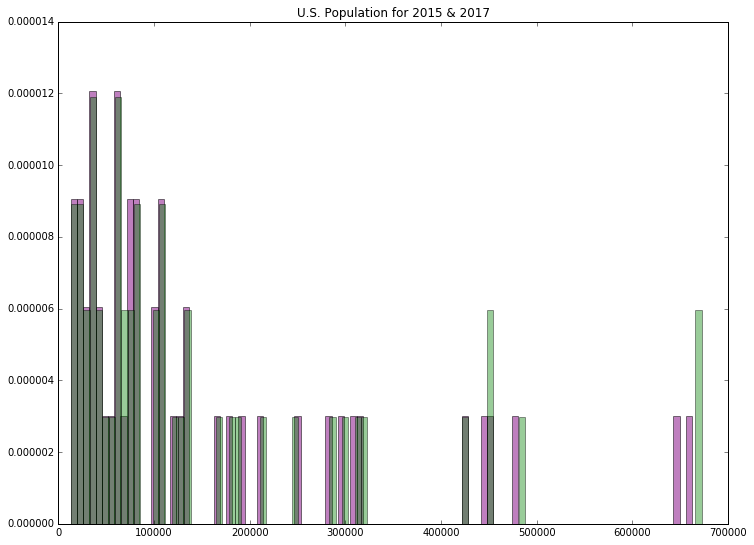

In [14]:
#Hist of Pop
x = state15['TotalPop']
y = state17['TotalPop']

plt.figure(figsize=(12,9))
plt.hist(x, bins=100, color='purple', density=True, alpha=.5)
plt.hist(y,bins=100, color='green', density=True, alpha=.4)
plt.title('U.S. Population for 2015 & 2017')
xlabel=('Population')

plt.show

### 2nd Question: Which regions in the United States have the largest populations?

I created a bubble chart where the population of each state is show by the size of the bubble.  As you can see by the bubble chart the South and West region both have a state that stands out in size of population.

As you can see from the comparisons below California and District of Columbia are the largest states in regards to population with the two states switching places in the top 2 places.  Also the 4th and 5th spots with Connecticut and Arizona switching places.  Though I think the most interesting fact is that the District of Columbia has a higher total population mean than the state of California.  There is a significant difference in size between the two states.  I am curious if the income of these two areas are similar due to being in the top two spots in total population in the United States.

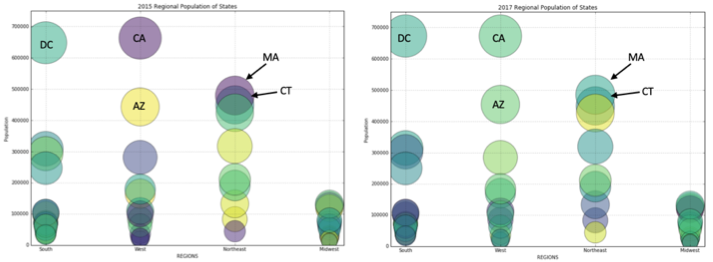

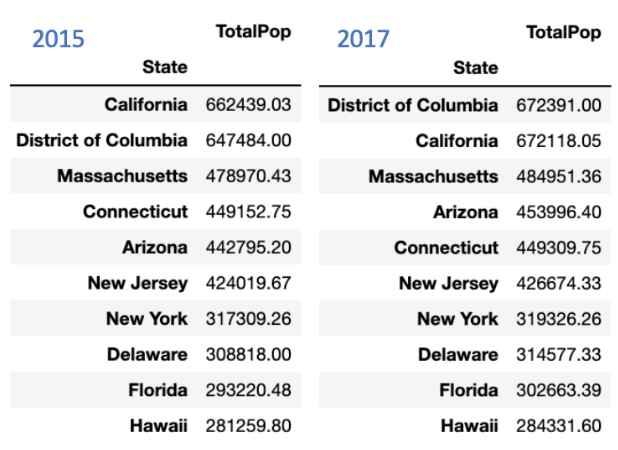

### 3rd Question: Is there a difference of income in the states with the largest populations?

I thought this was very interesting.  California is known for being an expensive place to live. However when taking the average income for an entire state, it is not in the top ten states.  I would speculate that there are enough smaller cities to impact the average state income.  

Another point of interest, the top ten states are the same from 2015 to 2017 with only the top three just switching spots.

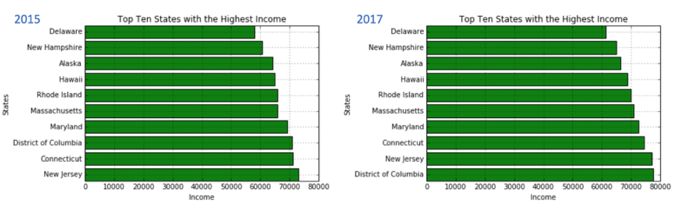

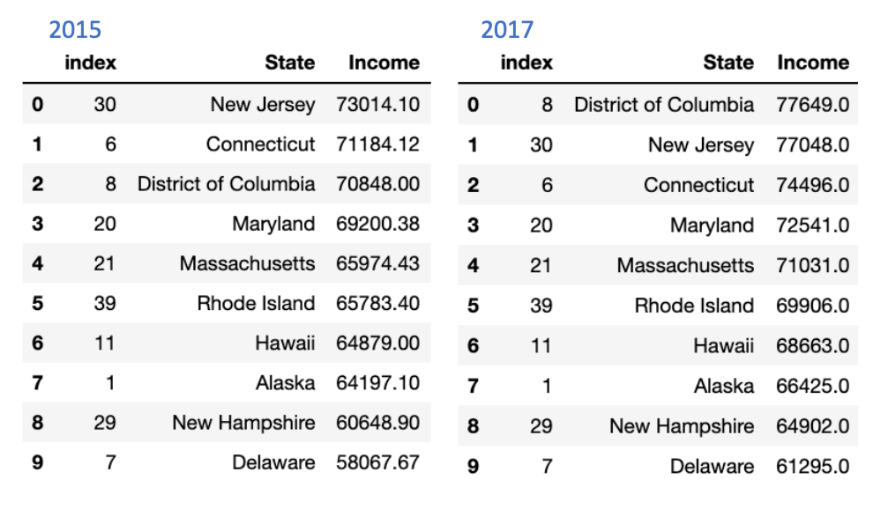

In [15]:
# Top ten states income levels for 2015
df_income15[['State','Income']].groupby(by='State')[['Income']].sum()

topten_income15= df_income15.nlargest(10,'Income','first')
topten_income15 = topten_income15.reset_index(drop=False)

topten_income15.head(10)

,index,State,Income
0,30,New Jersey,73014.10
1,6,Connecticut,71184.12
2,8,District of Columbia,70848.00
3,20,Maryland,69200.38
4,21,Massachusetts,65974.43
5,39,Rhode Island,65783.40
6,11,Hawaii,64879.00
7,1,Alaska,64197.10
8,29,New Hampshire,60648.90
9,7,Delaware,58067.67


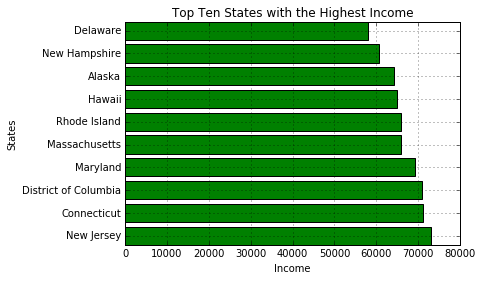

In [16]:
# Creating bar chart for income for top ten states for 2015 dataset
x = topten_income15['State']
y = topten_income15['Income']

plt.barh(x, y, color='Green')

# Add titles (main and on axis)
plt.grid(True)
plt.xlabel('Income')
plt.ylabel('States')
plt.title("Top Ten States with the Highest Income")

plt.show()

In [17]:
# Top ten states income levels for 2015
df_income17[['State','Income']].groupby(by='State')[['Income']].sum()

topten_income17= df_income17.nlargest(10,'Income','first')
topten_income17 = topten_income17.reset_index(drop=False)

topten_income17.head(10)

,index,State,Income
0,8,District of Columbia,77649.0
1,30,New Jersey,77048.0
2,6,Connecticut,74496.0
3,20,Maryland,72541.0
4,21,Massachusetts,71031.0
5,39,Rhode Island,69906.0
6,11,Hawaii,68663.0
7,1,Alaska,66425.0
8,29,New Hampshire,64902.0
9,7,Delaware,61295.0


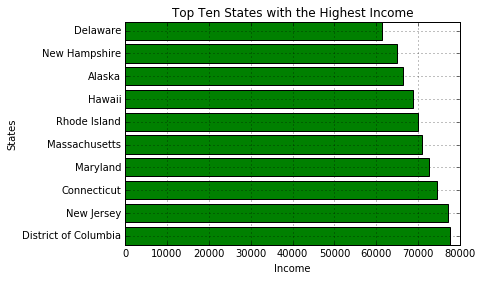

In [18]:
# Creating bar chart for income for top ten states for 2017 dataset
x = topten_income17['State']
y = topten_income17['Income']

plt.barh(x, y, color='Green')

# Add titles (main and on axis)
plt.grid(True)
plt.xlabel('Income')
plt.ylabel('States')
plt.title("Top Ten States with the Highest Income")

plt.show()

### Further Research

I would like to dig further into how my expectations of the the top ten states income did not include some of the top ten states in population.  In particular, I was expecting California and New York to be in the top ten states income list.  Perhaps digging down to the county level will show what the differences are and why they are making such a difference between population and income.  I think bringing in a slightly different dataset showing cities, instead of counties might be more helpful.  Using geomapping will provide a better visualization in showing the differences between the different areas of the United States.  Also possibly using NLP to find new articles from 2015 and 2017 that mention population and income may provide insight to events that occurred to cause changes in the total population of the states.